In [2]:
#Download chart library
!pip install chart-studio

  Stored in directory: C:\Users\vardh\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Set Seed
np.random.seed(2020)

# Reading the data

In [6]:
gpu_usage =pd.read_csv("sgemm_product.csv")
gpu_usage.shape

(241600, 18)

In [7]:
gpu_usage_1=gpu_usage
gpu_usage_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
MWG          241600 non-null int64
NWG          241600 non-null int64
KWG          241600 non-null int64
MDIMC        241600 non-null int64
NDIMC        241600 non-null int64
MDIMA        241600 non-null int64
NDIMB        241600 non-null int64
KWI          241600 non-null int64
VWM          241600 non-null int64
VWN          241600 non-null int64
STRM         241600 non-null int64
STRN         241600 non-null int64
SA           241600 non-null int64
SB           241600 non-null int64
Run1 (ms)    241600 non-null float64
Run2 (ms)    241600 non-null float64
Run3 (ms)    241600 non-null float64
Run4 (ms)    241600 non-null float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [10]:
#Calculate the average and setting the average_gpu_usage column
gpu_usage['average_gpu_runtime'] = gpu_usage[['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis = 1)
gpu_usage.head(10)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),average_gpu_runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625
5,16,16,16,8,8,8,8,2,1,1,0,1,0,1,81.10,82.41,87.01,82.14,83.1650
6,16,16,16,8,8,8,8,2,1,1,0,1,1,0,83.31,82.86,88.60,82.97,84.4350
7,16,16,16,8,8,8,8,2,1,1,0,1,1,1,93.13,94.30,96.19,94.43,94.5125
8,16,16,16,8,8,8,8,2,1,1,1,0,0,0,117.38,116.95,124.15,117.83,119.0775
9,16,16,16,8,8,8,8,2,1,1,1,0,0,1,85.76,85.30,86.96,87.19,86.3025


In [11]:
gpu_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 19 columns):
MWG                    241600 non-null int64
NWG                    241600 non-null int64
KWG                    241600 non-null int64
MDIMC                  241600 non-null int64
NDIMC                  241600 non-null int64
MDIMA                  241600 non-null int64
NDIMB                  241600 non-null int64
KWI                    241600 non-null int64
VWM                    241600 non-null int64
VWN                    241600 non-null int64
STRM                   241600 non-null int64
STRN                   241600 non-null int64
SA                     241600 non-null int64
SB                     241600 non-null int64
Run1 (ms)              241600 non-null float64
Run2 (ms)              241600 non-null float64
Run3 (ms)              241600 non-null float64
Run4 (ms)              241600 non-null float64
average_gpu_runtime    241600 non-null float64
dtypes: float64(5), int6

In [12]:
gpu_usage.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),average_gpu_runtime
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669,217.571953
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413,368.750161
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000,13.317500
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000,40.667500
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000,69.790000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000,228.387500
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000,3341.507500


In [14]:
gpu_usage.shape

(241600, 19)

# Checking for NA

In [15]:
gpu_usage.isnull().sum()

MWG                    0
NWG                    0
KWG                    0
MDIMC                  0
NDIMC                  0
MDIMA                  0
NDIMB                  0
KWI                    0
VWM                    0
VWN                    0
STRM                   0
STRN                   0
SA                     0
SB                     0
Run1 (ms)              0
Run2 (ms)              0
Run3 (ms)              0
Run4 (ms)              0
average_gpu_runtime    0
dtype: int64

# Visualization

The number of the 0,1% top values of average gpu usage' load is 241 and they have average gpu runtime higher than 63.89


Text(0.5, 1.0, 'Average gpu runtime distribution')

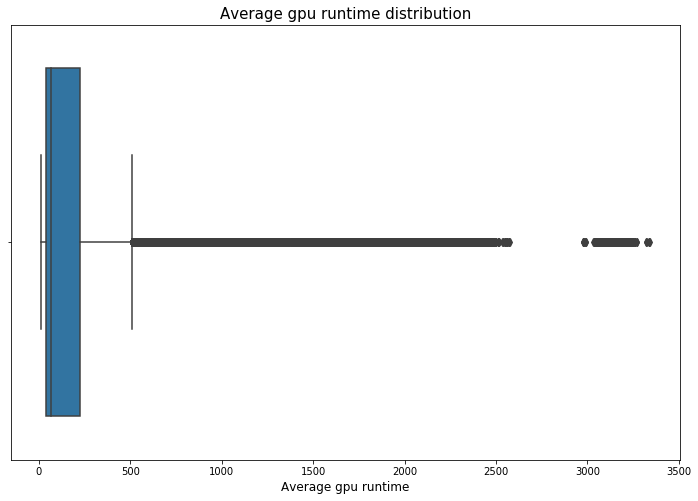

In [18]:
# Find outliers
sorted_average_gpu_runtime = gpu_usage.sort_values('average_gpu_runtime',ascending=False)
print("The number of the 0,1% top values of average gpu usage' load is",
      len(sorted_average_gpu_runtime.head(len(sorted_average_gpu_runtime)//1000)),"and they have average gpu runtime higher than",
      sorted_average_gpu_runtime.average_gpu_runtime[19])

# boxplot average_gpu_runtime
plt.figure(figsize=(12,8))
sns.boxplot(x="average_gpu_runtime", data=gpu_usage)
plt.xlabel('Average gpu runtime', fontsize=12)
plt.title("Average gpu runtime distribution", fontsize=15)

In [19]:
# Outliers removal
gpu_usage_a = gpu_usage.drop(gpu_usage[(gpu_usage.average_gpu_runtime>2500)|(gpu_usage.average_gpu_runtime<0)].index)
gpu_usage_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241089 entries, 0 to 241599
Data columns (total 19 columns):
MWG                    241089 non-null int64
NWG                    241089 non-null int64
KWG                    241089 non-null int64
MDIMC                  241089 non-null int64
NDIMC                  241089 non-null int64
MDIMA                  241089 non-null int64
NDIMB                  241089 non-null int64
KWI                    241089 non-null int64
VWM                    241089 non-null int64
VWN                    241089 non-null int64
STRM                   241089 non-null int64
STRN                   241089 non-null int64
SA                     241089 non-null int64
SB                     241089 non-null int64
Run1 (ms)              241089 non-null float64
Run2 (ms)              241089 non-null float64
Run3 (ms)              241089 non-null float64
Run4 (ms)              241089 non-null float64
average_gpu_runtime    241089 non-null float64
dtypes: float64(5), int6

In [21]:
gpu_usage_a = gpu_usage_a.drop("Run1 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run2 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run3 (ms)", axis= 1)
gpu_usage_a = gpu_usage_a.drop("Run4 (ms)", axis= 1)
gpu_usage_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241089 entries, 0 to 241599
Data columns (total 15 columns):
MWG                    241089 non-null int64
NWG                    241089 non-null int64
KWG                    241089 non-null int64
MDIMC                  241089 non-null int64
NDIMC                  241089 non-null int64
MDIMA                  241089 non-null int64
NDIMB                  241089 non-null int64
KWI                    241089 non-null int64
VWM                    241089 non-null int64
VWN                    241089 non-null int64
STRM                   241089 non-null int64
STRN                   241089 non-null int64
SA                     241089 non-null int64
SB                     241089 non-null int64
average_gpu_runtime    241089 non-null float64
dtypes: float64(1), int64(14)
memory usage: 29.4 MB


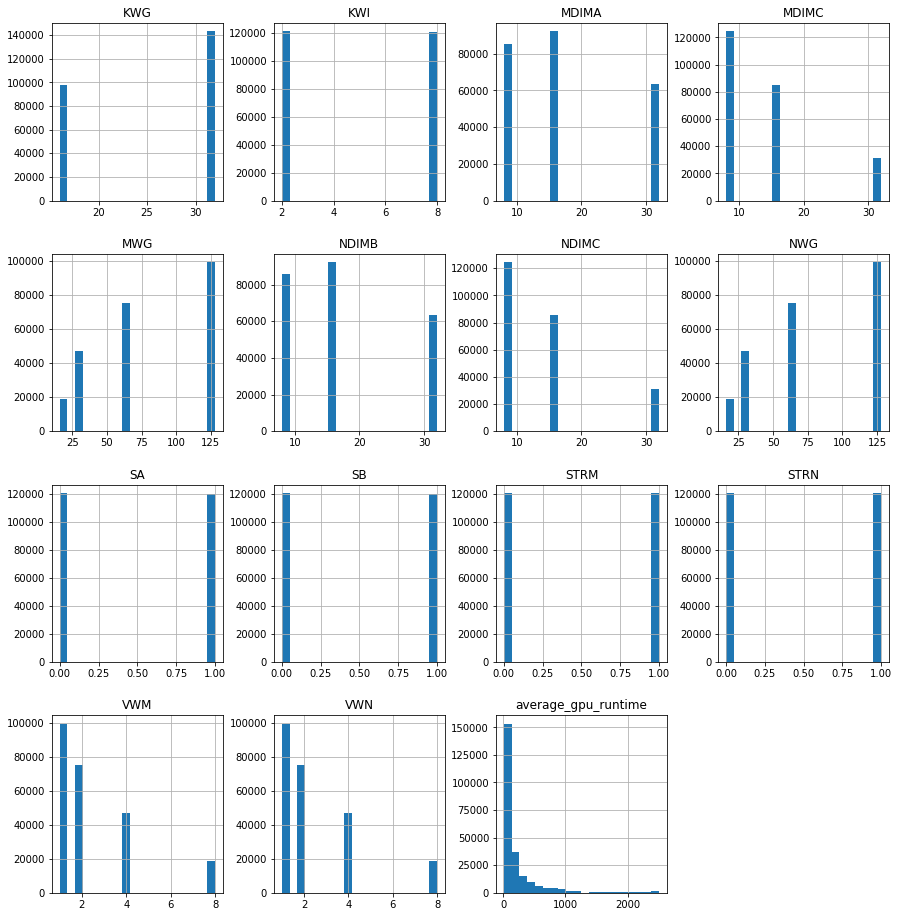

In [26]:
# Histogram of all the features to understand the distribution
gpu_usage_a.hist(bins = 20 , figsize= (15,16)) ;

In [28]:
gpu_usage_a['log_average_gpu_runtime'] = np.log(gpu_usage_a.average_gpu_runtime)


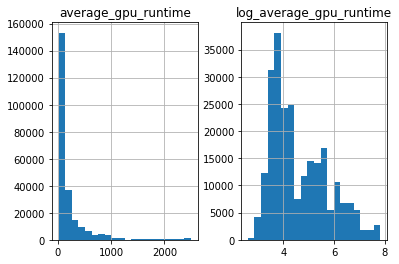

In [30]:
average_gpu_runtime = ["average_gpu_runtime","log_average_gpu_runtime"]
average_gpu_runtime = gpu_usage_a[average_gpu_runtime]
average_gpu_runtime.hist(bins = 20 ) ;

In [32]:
# finding correlatin matrix of all the attributes
gpu_usage_a.corr()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,average_gpu_runtime,log_average_gpu_runtime
MWG,1.000000,-0.002066,0.007350,0.107789,-0.006813,0.159147,0.014885,-0.002129,0.353750,-0.001829,-0.000014,-0.000126,-0.002381,-0.002381,0.357835,0.456903
NWG,-0.002066,1.000000,0.007350,-0.006813,0.107789,0.014924,0.159110,-0.002129,-0.002039,0.353900,-0.000014,-0.000126,-0.002381,-0.002381,0.324165,0.343041
KWG,0.007350,0.007350,1.000000,0.149866,0.149866,-0.034633,-0.034663,-0.001568,-0.012899,-0.012742,-0.000010,-0.000093,-0.001753,-0.001753,-0.002681,-0.025931
MDIMC,0.107789,-0.006813,0.149866,1.000000,-0.211021,0.197773,0.084783,0.001431,-0.133457,0.011219,0.000009,0.000085,0.001601,0.001601,-0.223831,-0.249835
NDIMC,-0.006813,0.107789,0.149866,-0.211021,1.000000,0.084755,0.197803,0.001431,0.011362,-0.133576,0.000009,0.000085,0.001601,0.001601,-0.216854,-0.241108
MDIMA,0.159147,0.014924,-0.034633,0.197773,0.084755,1.000000,0.088306,-0.000027,-0.202655,-0.019106,0.000009,0.000009,-0.000009,-0.000009,-0.007628,-0.023356
NDIMB,0.014885,0.159110,-0.034663,0.084783,0.197803,0.088306,1.000000,0.000008,-0.019152,-0.202684,-0.000012,-0.000026,-0.000044,-0.000044,-0.009618,-0.034182
KWI,-0.002129,-0.002129,-0.001568,0.001431,0.001431,-0.000027,0.000008,1.000000,-0.000820,-0.001007,0.000012,0.000112,-0.001900,-0.001900,0.018638,-0.017166
VWM,0.353750,-0.002039,-0.012899,-0.133457,0.011362,-0.202655,-0.019152,-0.000820,1.000000,0.000823,0.000016,-0.000123,-0.001066,-0.001066,0.167642,0.208815
VWN,-0.001829,0.353900,-0.012742,0.011219,-0.133576,-0.019106,-0.202684,-0.001007,0.000823,1.000000,-0.000010,0.000064,-0.000879,-0.000879,0.147737,0.144004


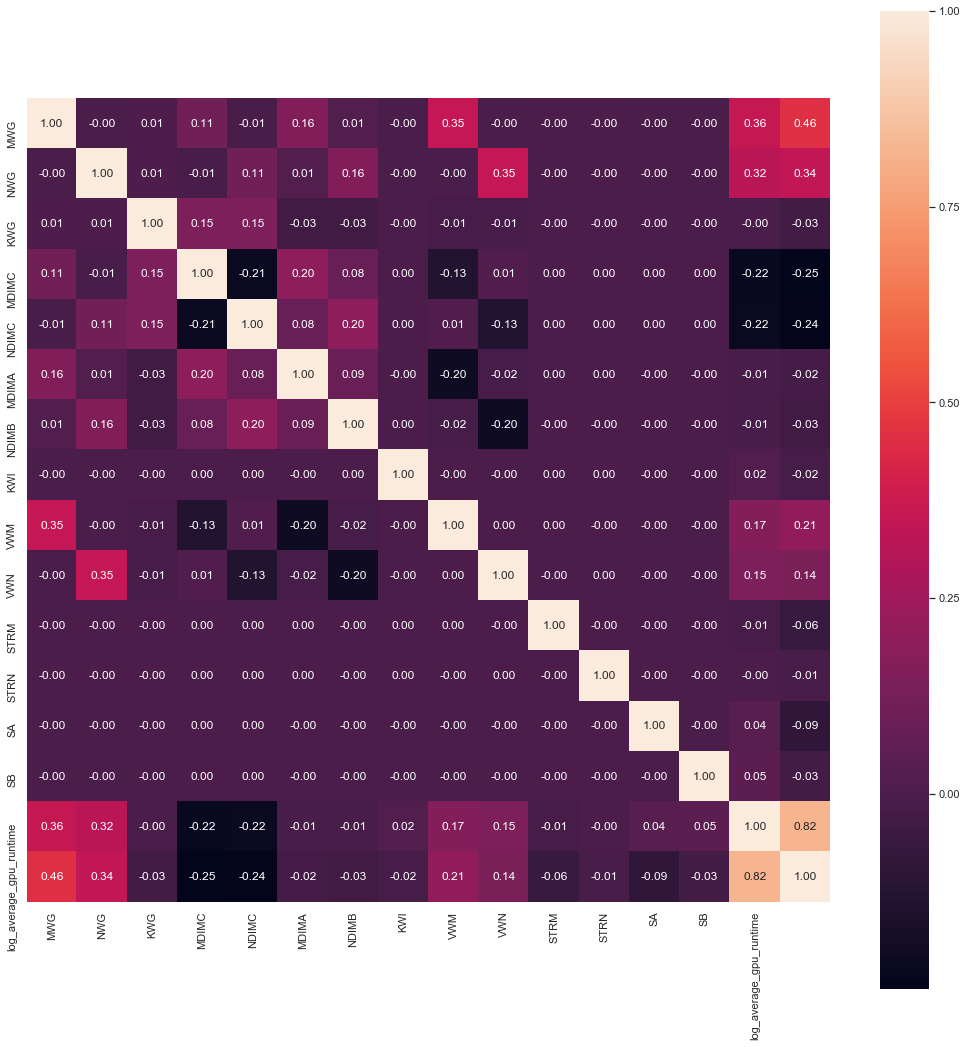

In [33]:
#Ploting correlation matrix
col = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB', 'log_average_gpu_runtime']
corr = gpu_usage_a.corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

# Checking for multicollinearity

In [34]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(gpu_usage, 40))

Top Absolute Correlations
Run2 (ms)  average_gpu_runtime    0.999991
Run4 (ms)  average_gpu_runtime    0.999991
Run3 (ms)  average_gpu_runtime    0.999990
Run2 (ms)  Run4 (ms)              0.999982
           Run3 (ms)              0.999982
Run3 (ms)  Run4 (ms)              0.999981
Run1 (ms)  average_gpu_runtime    0.999970
           Run2 (ms)              0.999941
           Run4 (ms)              0.999940
           Run3 (ms)              0.999939
NWG        VWN                    0.353763
MWG        VWM                    0.353763
           Run3 (ms)              0.351920
           Run4 (ms)              0.351918
           Run2 (ms)              0.351876
           average_gpu_runtime    0.351810
           Run1 (ms)              0.351506
NWG        Run3 (ms)              0.320550
           average_gpu_runtime    0.320460
           Run4 (ms)              0.320458
           Run1 (ms)              0.320408
           Run2 (ms)              0.320405
MDIMC      Run1 (ms)        

In [35]:
gpu_usage_a[gpu_usage_a.columns[:]].corr()['log_average_gpu_runtime'][:]

MWG                        0.456903
NWG                        0.343041
KWG                       -0.025931
MDIMC                     -0.249835
NDIMC                     -0.241108
MDIMA                     -0.023356
NDIMB                     -0.034182
KWI                       -0.017166
VWM                        0.208815
VWN                        0.144004
STRM                      -0.059465
STRN                      -0.008190
SA                        -0.092156
SB                        -0.027035
average_gpu_runtime        0.822612
log_average_gpu_runtime    1.000000
Name: log_average_gpu_runtime, dtype: float64

# Column management

In [43]:
feature_a = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']
avg_gpu_usage_1 = ['log_average_gpu_runtime']
feature_1 = gpu_usage_a[feature_a]
target_1 = gpu_usage_a[avg_gpu_usage_1]

In [44]:
feature_1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0


# Experiment 1

In [45]:
x1_train, x1_test, y1_train, y1_test = train_test_split(feature_1, target_1, test_size = 0.2, random_state = 0)

# Scaling

In [46]:
scaler = StandardScaler() 
  
# To scale data 
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.transform(x1_test)
y1_train = scaler.fit_transform(y1_train)
y1_test=scaler.transform(y1_test)

# Cst function

In [47]:
def costFunction(dataFile, dataTarget, coeffMatrix):
    dataLength = len(dataFile);
    costValue = np.sum(((dataFile.dot(coeffMatrix.T)) - dataTarget) ** 2) / (2 * dataLength);
    return costValue;

# Gradient Descent Function for fixed threshold

In [48]:
def gradientDescent(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list1=[0.0000001]; #threshold level
    cost1 = []
    for k in list1:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;

# linear regression function for Different Learning rate

In [49]:
def developLinearModel(dataFile, dataTarget):
    list2=[0.2,0.1,0.01,0.05,0.001,0.005,0.0001,0.0005];
    for learning_rate in list2:
        coeffMatrix = np.zeros((1, len(dataFile[0])));
        print(coeffMatrix);
        print();
        initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
        print('Initial Cost: ', initialCost, '\n');
        coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix, learning_rate, 50000);
    return coeffMatrix;

# Predict

In [50]:
def predict(testData, coeffMatrix):
    predictedTarget = testData.dot(coeffMatrix.T);
    return predictedTarget;

# MSE

In [51]:
def calculateMSE(testTarget, predictedTarget):
    modelRMSE = (sum((testTarget - predictedTarget) ** 2) / len(testTarget));
    return modelRMSE;

# R_Square

In [52]:
def modelRSquared(testTarget, predictedTarget):
    targetMean = np.mean(testTarget);
    totalSSE = np.sum((testTarget - targetMean) ** 2);
    residualSSE = np.sum((testTarget - predictedTarget) ** 2);
    rSquared = 1 - (residualSSE / totalSSE);
    return rSquared;

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.2214328936484323 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.2


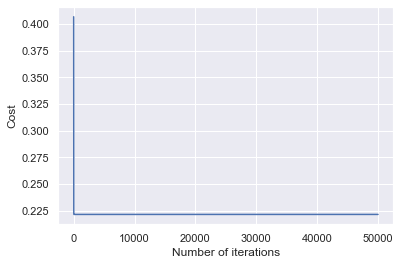

In [53]:
#Model Training for Alpha = 0.2
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;
linearModel_tr1= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 110 

Model Cost:  0.22143335932112695 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.1


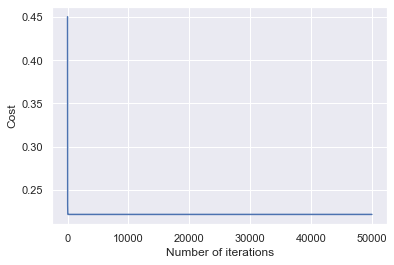

In [54]:
#Model Training for Alpha = 0.1
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.1, 50000);
    return coeffMatrix;
linearModel_tr2= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 915 

Model Cost:  0.22144197478694572 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.01


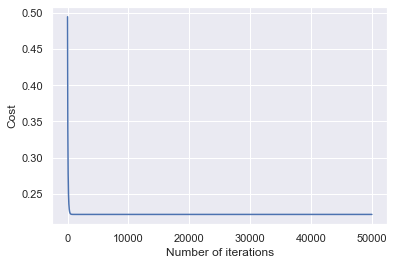

In [55]:
#Model Training for Alpha = 0.01
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.01, 50000);
    return coeffMatrix;
linearModel_tr3= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 211 

Model Cost:  0.2214343024530311 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.05


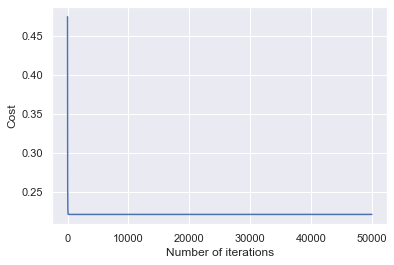

In [56]:
#Model Training for Alpha = 0.05
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.05, 50000);
    return coeffMatrix;
linearModel_tr4= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 1699 

Model Cost:  0.22145165251271898 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.005


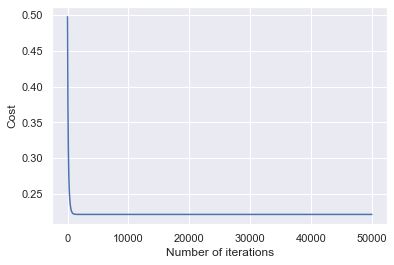

In [57]:
#Model Training for Alpha = 0.005
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.005, 50000);
    return coeffMatrix;
linearModel_tr5= developLinearModel(x1_train,y1_train)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.22103145028861879 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.2


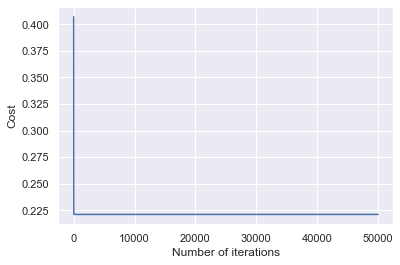

In [58]:
#Model testing for Alpha = 0.2
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;

linearModel_te1 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-07 

Cost Function converges at 110 

Model Cost:  0.22103189666556483 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.1


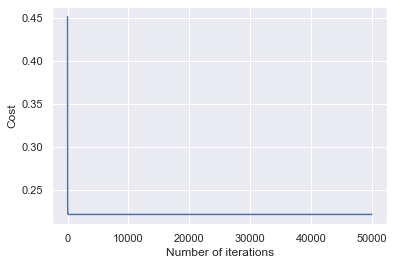

In [59]:
#Model testing for Alpha = 0.1
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.1, 50000);
    return coeffMatrix;

linearModel_te2 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-07 

Cost Function converges at 911 

Model Cost:  0.2210405938356105 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.01


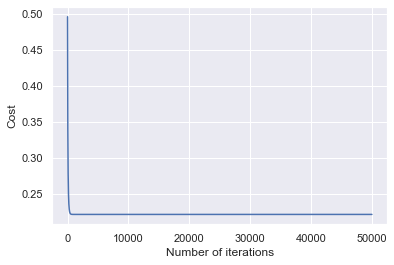

In [60]:
#Model testing for Alpha = 0.01
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.01, 50000);
    return coeffMatrix;

linearModel_te3 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-07 

Cost Function converges at 210 

Model Cost:  0.22103290122041583 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.05


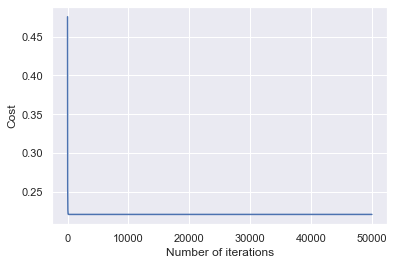

In [61]:
#Model testing for Alpha = 0.05
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.05, 50000);
    return coeffMatrix;

linearModel_te4 = developLinearModel(x1_test,y1_test);

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-07 

Cost Function converges at 1693 

Model Cost:  0.22105015293043326 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.005


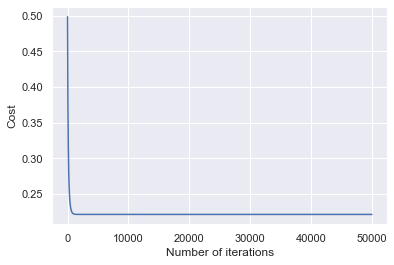

In [62]:
#Model testing for Alpha = 0.005
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.005, 50000);
    return coeffMatrix;

linearModel_te5= developLinearModel(x1_test,y1_test);

In [63]:
#Linear Regression using In-built Function:
from sklearn import datasets, linear_model, metrics 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(x1_train, y1_train) 
  
# regression coefficients 
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.2214328936484323 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.2


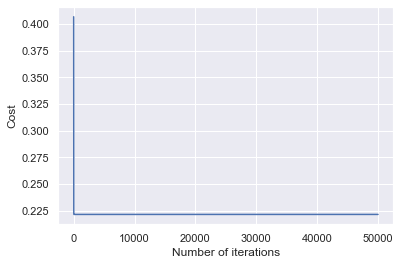

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.22103145028861879 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.2


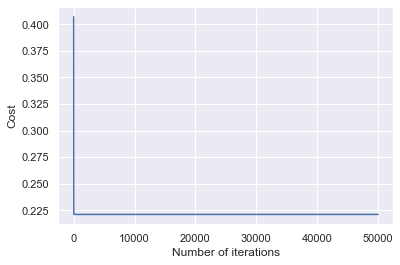

In [64]:
#Linear regression Function for best Alpha value
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;

linearModel_trbe = developLinearModel(x1_train,y1_train)
linearModel_tebe = developLinearModel(x1_test,y1_test)

In [65]:
predictedTarget_te1 = predict(x1_test, linearModel_te1);
predictedTarget_te2 = predict(x1_test, linearModel_te2);
predictedTarget_te3 = predict(x1_test, linearModel_te3);
predictedTarget_te4 = predict(x1_test, linearModel_te4);
predictedTarget_te5 = predict(x1_test, linearModel_te5);

predictedTarget_tr1 = predict(x1_train, linearModel_tr1);
predictedTarget_tr2 = predict(x1_train, linearModel_tr2);
predictedTarget_tr3 = predict(x1_train, linearModel_tr3);
predictedTarget_tr4 = predict(x1_train, linearModel_tr4);
predictedTarget_tr5 = predict(x1_train, linearModel_tr5);

In [66]:
modelMSE_te1 = calculateMSE(y1_test, predictedTarget_te1);
modelMSE_te2 = calculateMSE(y1_test, predictedTarget_te2);
modelMSE_te3 = calculateMSE(y1_test, predictedTarget_te3);
modelMSE_te4= calculateMSE(y1_test, predictedTarget_te4);
modelMSE_te5 = calculateMSE(y1_test, predictedTarget_te5);

modelMSE_tr1 = calculateMSE(y1_train, predictedTarget_tr1);
modelMSE_tr2 = calculateMSE(y1_train, predictedTarget_tr2);
modelMSE_tr3 = calculateMSE(y1_train, predictedTarget_tr3);
modelMSE_tr4 = calculateMSE(y1_train, predictedTarget_tr4);
modelMSE_tr5 = calculateMSE(y1_train, predictedTarget_tr5);

In [67]:
print('Model MSE Train1 for Alpha 0.2:', modelMSE_tr1,'\n');
print('Model MSE Train2 for Alpha 0.1:', modelMSE_tr2,'\n');
print('Model MSE Train3 for Alpha 0.01:', modelMSE_tr3,'\n');
print('Model MSE Train4 for Alpha 0.05:', modelMSE_tr4,'\n');
print('Model MSE Train5 for Alpha 0.005:', modelMSE_tr5,'\n');

Model MSE Train1 for Alpha 0.2: [0.44286479] 

Model MSE Train2 for Alpha 0.1: [0.44286479] 

Model MSE Train3 for Alpha 0.01: [0.44286479] 

Model MSE Train4 for Alpha 0.05: [0.44286479] 

Model MSE Train5 for Alpha 0.005: [0.44286479] 



In [68]:
print('Model MSE Test for Alpha 0.2:', modelMSE_te1,'\n');
print('Model MSE Test for Alpha 0.1:', modelMSE_te2,'\n');
print('Model MSE Test for Alpha 0.01', modelMSE_te3,'\n');
print('Model MSE Test for Alpha 0.05:', modelMSE_te4,'\n');
print('Model MSE Test for Alpha 0.005:', modelMSE_te5,'\n');

Model MSE Test for Alpha 0.2: [0.44206195] 

Model MSE Test for Alpha 0.1: [0.44206195] 

Model MSE Test for Alpha 0.01 [0.44206195] 

Model MSE Test for Alpha 0.05: [0.44206195] 

Model MSE Test for Alpha 0.005: [0.44206195] 



In [69]:
modelR2_tr1 = modelRSquared(y1_train, predictedTarget_tr1);
modelR2_tr2 = modelRSquared(y1_train, predictedTarget_tr2);
modelR2_tr3 = modelRSquared(y1_train, predictedTarget_tr3);
modelR2_tr4 = modelRSquared(y1_train, predictedTarget_tr4);
modelR2_tr5 = modelRSquared(y1_train, predictedTarget_tr5);

modelR2_te1 = modelRSquared(y1_test, predictedTarget_te1);
modelR2_te2 = modelRSquared(y1_test, predictedTarget_te2);
modelR2_te3 = modelRSquared(y1_test, predictedTarget_te3);
modelR2_te4 = modelRSquared(y1_test, predictedTarget_te4);
modelR2_te5 = modelRSquared(y1_test, predictedTarget_te5);

In [70]:
print('Model R-Squared for Training: ','\n', modelR2_tr1,'\n', modelR2_tr2,'\n', 
      modelR2_tr3,'\n', modelR2_tr4,'\n',modelR2_tr5, '\n');

Model R-Squared for Training:  
 0.5571352075376292 
 0.5571352075376292 
 0.5571352075376295 
 0.5571352075376292 
 0.5571352075376295 



In [71]:
print('Model R-Squared for Test: ','\n', modelR2_te1,'\n', modelR2_te2,'\n', 
      modelR2_te3,'\n', modelR2_te4,'\n',modelR2_te5, '\n');

Model R-Squared for Test:  
 0.5591393174777735 
 0.5591393174777733 
 0.5591393174777735 
 0.5591393174777733 
 0.5591393174777733 



# Exp b : classification

In [73]:
feature_b=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']
feature_1b = gpu_usage_a[feature_b]

In [74]:
gpu_usage_a['average_gpu_runtime_Class'] = np.where(gpu_usage_a['average_gpu_runtime']>=70, 1, 0)
gpu_usage_a['average_gpu_runtime_Class'] = gpu_usage_a['average_gpu_runtime_Class'].astype('category')

In [77]:
target_2 = gpu_usage_a['average_gpu_runtime_Class']
target_2.head()

0    1
1    1
2    1
3    1
4    1
Name: average_gpu_runtime_Class, dtype: category
Categories (2, int64): [0, 1]

In [78]:
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(feature_1b, target_2, test_size = 0.20, random_state = 0)

# Gradient boosting classifier

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,1.25]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_l, y_train_l)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l, y_train_l)))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l, y_test_l)))

Learning rate:  0.05
Accuracy score (training): 0.772
Accuracy score (test): 0.773
Learning rate:  0.075
Accuracy score (training): 0.776
Accuracy score (test): 0.777
Learning rate:  0.1
Accuracy score (training): 0.780
Accuracy score (test): 0.780
Learning rate:  0.25
Accuracy score (training): 0.819
Accuracy score (test): 0.821
Learning rate:  0.5
Accuracy score (training): 0.821
Accuracy score (test): 0.822
Learning rate:  0.75
Accuracy score (training): 0.824
Accuracy score (test): 0.824
Learning rate:  1
Accuracy score (training): 0.827
Accuracy score (test): 0.825
Learning rate:  1.25
Accuracy score (training): 0.819
Accuracy score (test): 0.817


In [81]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,1.25]

for learning_rate in lr_list:
    gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf2.fit(X_train_l, y_train_l)
    predictions = gb_clf2.predict(X_test_l)
    print("Learning rate: ", learning_rate)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_l, predictions))
    print("Classification Report")
    print(classification_report(y_test_l, predictions))

Learning rate:  0.05
Confusion Matrix:
[[19904  4246]
 [ 6686 17382]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.82      0.78     24150
           1       0.80      0.72      0.76     24068

    accuracy                           0.77     48218
   macro avg       0.78      0.77      0.77     48218
weighted avg       0.78      0.77      0.77     48218

Learning rate:  0.075
Confusion Matrix:
[[20019  4131]
 [ 6630 17438]]
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     24150
           1       0.81      0.72      0.76     24068

    accuracy                           0.78     48218
   macro avg       0.78      0.78      0.78     48218
weighted avg       0.78      0.78      0.78     48218

Learning rate:  0.1
Confusion Matrix:
[[20072  4078]
 [ 6549 17519]]
Classification Report
              precision    recall  f1-score   support

           0   

# Devwloping the linear model

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.001 

Cost Function converges at 14 

Model Cost:  0.2264156137693888 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.2


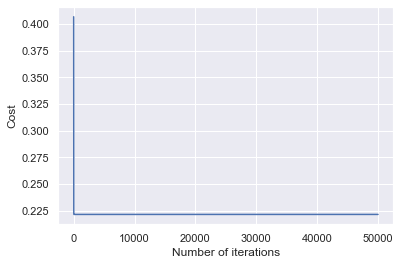

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 0.001 

Cost Function converges at 14 

Model Cost:  0.22593342047680864 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.2


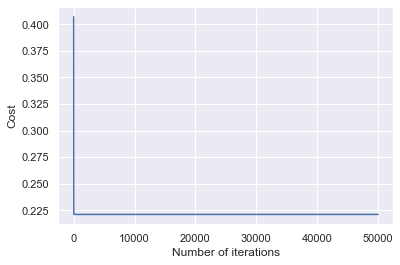

In [82]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,50000);
    return coeffMatrix;
linearModel_tr11 = developLinearModel_1(x1_train,y1_train)
linearModel_te11 = developLinearModel_1(x1_test,y1_test)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 0.0001 

Cost Function converges at 25 

Model Cost:  0.22187601374255358 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.2


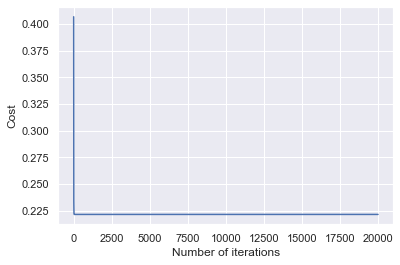

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 0.0001 

Cost Function converges at 25 

Model Cost:  0.22146325633096536 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.2


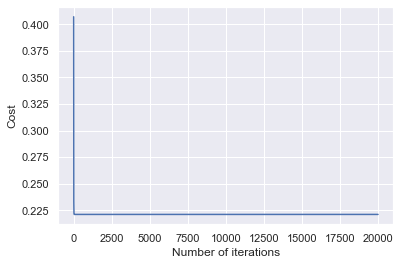

In [83]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.0001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
linearModel_tr21 = developLinearModel_1(x1_train,y1_train)
linearModel_te21 = developLinearModel_1(x1_test,y1_test)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-05 

Cost Function converges at 35 

Model Cost:  0.22148187768679992 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.2


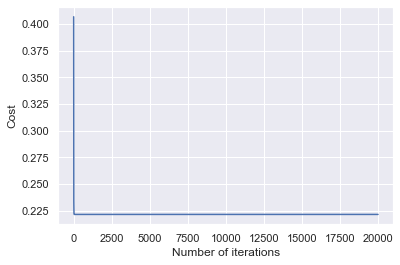

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-05 

Cost Function converges at 35 

Model Cost:  0.22107881118586875 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.2


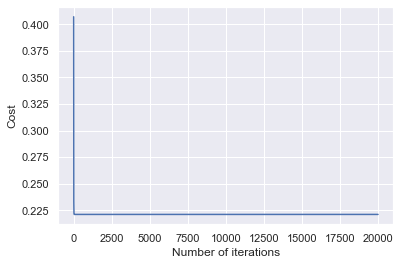

In [84]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.00001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
linearModel_tr31 = developLinearModel_1(x1_train,y1_train)
linearModel_te31 = developLinearModel_1(x1_test,y1_test)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-06 

Cost Function converges at 46 

Model Cost:  0.2214368383330077 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.2


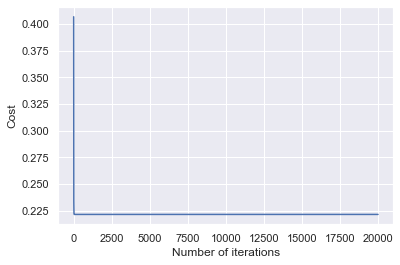

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-06 

Cost Function converges at 46 

Model Cost:  0.22103523647134243 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.2


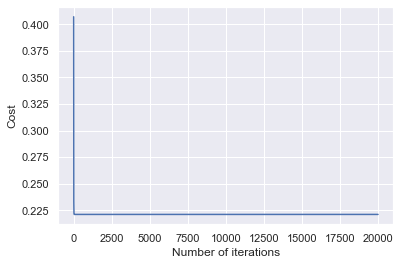

In [85]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.000001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
linearModel_tr41 = developLinearModel_1(x1_train,y1_train)
linearModel_te41 = developLinearModel_1(x1_test,y1_test)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.2214328936484323 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.2


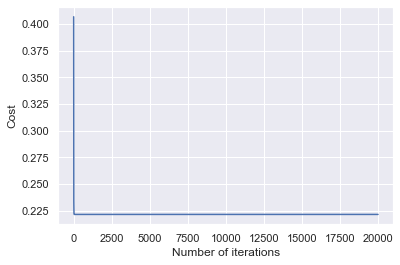

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.22103145028861879 

Model Coefficients: 
[[ 5.03945847e-01  3.97442021e-01  7.67929989e-02 -3.94714198e-01
  -3.81280752e-01 -4.02673890e-04 -2.86102261e-03 -1.81029797e-02
  -1.56016625e-02 -4.16766373e-02 -5.45007663e-02 -4.85821976e-03
  -9.06122486e-02 -1.98158678e-02]]
alpha: 0.2


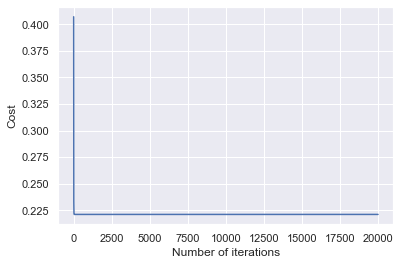

In [86]:
#Best Model
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.0000001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLinearModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
linearModel_tr51 = developLinearModel_1(x1_train,y1_train)
linearModel_te51 = developLinearModel_1(x1_test,y1_test)


In [87]:
predictedTarget_te11 = predict(x1_test, linearModel_te11);
predictedTarget_te21 = predict(x1_test, linearModel_te21);
predictedTarget_te31 = predict(x1_test, linearModel_te31);
predictedTarget_te41 = predict(x1_test, linearModel_te41);
predictedTarget_te51 = predict(x1_test, linearModel_te51);

predictedTarget_tr11 = predict(x1_train, linearModel_tr11);
predictedTarget_tr21 = predict(x1_train, linearModel_tr21);
predictedTarget_tr31 = predict(x1_train, linearModel_tr31);
predictedTarget_tr41 = predict(x1_train, linearModel_tr41);
predictedTarget_tr51 = predict(x1_train, linearModel_tr51);

In [88]:
modelMSE_te11 = calculateMSE(y1_test, predictedTarget_te11);
modelMSE_te21 = calculateMSE(y1_test, predictedTarget_te21);
modelMSE_te31 = calculateMSE(y1_test, predictedTarget_te31);
modelMSE_te41= calculateMSE(y1_test, predictedTarget_te41);
modelMSE_te51 = calculateMSE(y1_test, predictedTarget_te51);

modelMSE_tr11 = calculateMSE(y1_train, predictedTarget_tr11);
modelMSE_tr21 = calculateMSE(y1_train, predictedTarget_tr21);
modelMSE_tr31 = calculateMSE(y1_train, predictedTarget_tr31);
modelMSE_tr41 = calculateMSE(y1_train, predictedTarget_tr41);
modelMSE_tr51 = calculateMSE(y1_train, predictedTarget_tr51);

In [89]:
print('Model MSE Train1 for Threshold 0.001:', modelMSE_tr11,'\n');
print('Model MSE Train2 for Threshold 0.0001:', modelMSE_tr21,'\n');
print('Model MSE Train3 for Threshold 0.00001:', modelMSE_tr31,'\n');
print('Model MSE Train4 for Threshold 0.000001:', modelMSE_tr41,'\n');
print('Model MSE Train5 for Threshold 0.0000001:', modelMSE_tr51,'\n');

Model MSE Train1 for Threshold 0.001: [0.44286479] 

Model MSE Train2 for Threshold 0.0001: [0.44286479] 

Model MSE Train3 for Threshold 0.00001: [0.44286479] 

Model MSE Train4 for Threshold 0.000001: [0.44286479] 

Model MSE Train5 for Threshold 0.0000001: [0.44286479] 



In [90]:
print('Model MSE Test for Threshold 0.001:', modelMSE_te11,'\n');
print('Model MSE Test for Threshold 0.0001:', modelMSE_te21,'\n');
print('Model MSE Test for Threshold 0.00001:', modelMSE_te31,'\n');
print('Model MSE Test for Threshold 0.000001:', modelMSE_te41,'\n');
print('Model MSE Test for Threshold 0.0000001:', modelMSE_te51,'\n');

Model MSE Test for Threshold 0.001: [0.44206195] 

Model MSE Test for Threshold 0.0001: [0.44206195] 

Model MSE Test for Threshold 0.00001: [0.44206195] 

Model MSE Test for Threshold 0.000001: [0.44206195] 

Model MSE Test for Threshold 0.0000001: [0.44206195] 



In [91]:
modelR2_tr11 = modelRSquared(y1_train, predictedTarget_tr11);
modelR2_tr21 = modelRSquared(y1_train, predictedTarget_tr21);
modelR2_tr31 = modelRSquared(y1_train, predictedTarget_tr31);
modelR2_tr41 = modelRSquared(y1_train, predictedTarget_tr41);
modelR2_tr51 = modelRSquared(y1_train, predictedTarget_tr51);

modelR2_te11 = modelRSquared(y1_test, predictedTarget_te11);
modelR2_te21 = modelRSquared(y1_test, predictedTarget_te21);
modelR2_te31 = modelRSquared(y1_test, predictedTarget_te31);
modelR2_te41 = modelRSquared(y1_test, predictedTarget_te41);
modelR2_te51 = modelRSquared(y1_test, predictedTarget_te51);

In [92]:
print('Model R-Squared for Training: ','\n', modelR2_tr11,'\n', modelR2_tr21,'\n', 
      modelR2_tr31,'\n', modelR2_tr41,'\n',modelR2_tr51, '\n');

Model R-Squared for Training:  
 0.5571352075376292 
 0.5571352075376292 
 0.5571352075376292 
 0.5571352075376292 
 0.5571352075376292 



In [93]:
print('Model R-Squared for Test: ','\n', modelR2_te11,'\n', modelR2_te21,'\n', 
      modelR2_te31,'\n', modelR2_te41,'\n',modelR2_te51, '\n');

Model R-Squared for Test:  
 0.5591393174777735 
 0.5591393174777735 
 0.5591393174777735 
 0.5591393174777735 
 0.5591393174777735 



# Experiment_2 for logistic regression

In [128]:
avg_gpu_usage_x = ['average_gpu_runtime_Class']
target_x = gpu_usage_a[avg_gpu_usage_x]
target_x

from sklearn.model_selection import train_test_split
x1_train_l, x1_test_l, y1_train_l, y1_test_l = train_test_split(feature_1b, target_x, test_size = 0.20, random_state = 0)


In [129]:
# To scale data 
x1_train_l = scaler.fit_transform(x1_train_l)
x1_test_l = scaler.transform(x1_test_l)
y1_train_l = scaler.fit_transform(y1_train_l)
y1_test_l = scaler.transform(y1_test_l)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4999999999999998 

Threshold level 0.001 

Cost Function converges at 12 

Model Cost:  0.32605178376197813 

Model Coefficients: 
[[ 0.44917305  0.27504323  0.04886828 -0.28719797 -0.24562571 -0.01238468
  -0.02016434 -0.00444076 -0.02129589 -0.04532177 -0.10232155 -0.0107943
  -0.12658488 -0.02685845]]
alpha: 0.2


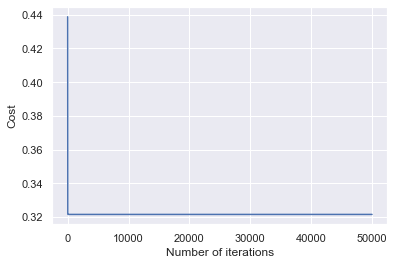

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.500021685936652 

Threshold level 0.001 

Cost Function converges at 12 

Model Cost:  0.3242811716368278 

Model Coefficients: 
[[ 0.45087771  0.27599623  0.04395744 -0.28873858 -0.24240392 -0.0119899
  -0.02190159 -0.00644696 -0.01921664 -0.04378868 -0.10003214 -0.0042756
  -0.12517046 -0.02116267]]
alpha: 0.2


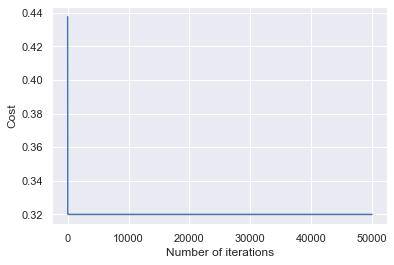

In [130]:


#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLogisticModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,50000);
    return coeffMatrix;
logisticModel_tr11 = developLogisticModel_1(x1_train_l,y1_train_l)
logisticModel_te11 = developLogisticModel_1(x1_test_l,y1_test_l)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4999999999999998 

Threshold level 0.0001 

Cost Function converges at 22 

Model Cost:  0.32205971719240606 

Model Coefficients: 
[[ 0.44917305  0.27504323  0.04886828 -0.28719797 -0.24562571 -0.01238468
  -0.02016434 -0.00444076 -0.02129589 -0.04532177 -0.10232155 -0.0107943
  -0.12658488 -0.02685845]]
alpha: 0.2


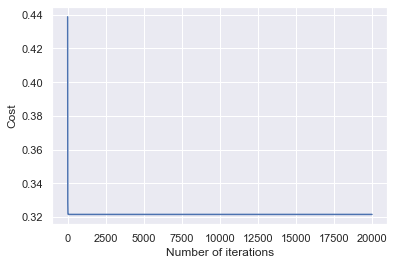

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.500021685936652 

Threshold level 0.0001 

Cost Function converges at 22 

Model Cost:  0.32036026962023395 

Model Coefficients: 
[[ 0.45087771  0.27599623  0.04395744 -0.28873858 -0.24240392 -0.0119899
  -0.02190159 -0.00644696 -0.01921664 -0.04378868 -0.10003214 -0.0042756
  -0.12517046 -0.02116267]]
alpha: 0.2


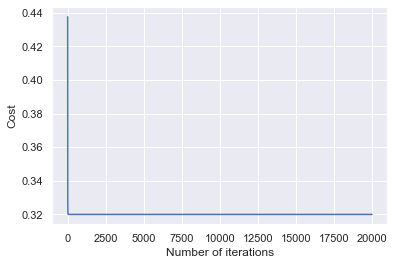

In [131]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.0001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLogisticModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
logisticModel_tr21 = developLogisticModel_1(x1_train_l,y1_train_l)
logisticModel_te21 = developLogisticModel_1(x1_test_l,y1_test_l)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4999999999999998 

Threshold level 1e-05 

Cost Function converges at 33 

Model Cost:  0.32160779433052966 

Model Coefficients: 
[[ 0.44917305  0.27504323  0.04886828 -0.28719797 -0.24562571 -0.01238468
  -0.02016434 -0.00444076 -0.02129589 -0.04532177 -0.10232155 -0.0107943
  -0.12658488 -0.02685845]]
alpha: 0.2


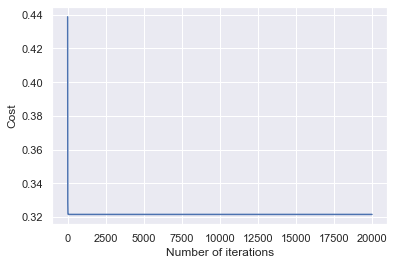

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.500021685936652 

Threshold level 1e-05 

Cost Function converges at 33 

Model Cost:  0.31991913319942317 

Model Coefficients: 
[[ 0.45087771  0.27599623  0.04395744 -0.28873858 -0.24240392 -0.0119899
  -0.02190159 -0.00644696 -0.01921664 -0.04378868 -0.10003214 -0.0042756
  -0.12517046 -0.02116267]]
alpha: 0.2


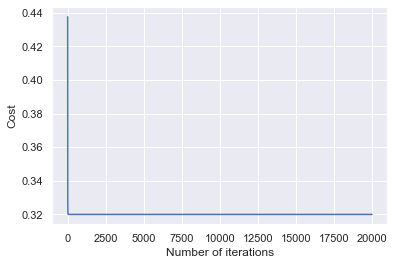

In [132]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.00001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLogisticModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
logisticModel_tr31 = developLogisticModel_1(x1_train_l,y1_train_l)
logisticModel_te31 = developLogisticModel_1(x1_test_l,y1_test_l)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4999999999999998 

Threshold level 1e-06 

Cost Function converges at 43 

Model Cost:  0.32156792022212594 

Model Coefficients: 
[[ 0.44917305  0.27504323  0.04886828 -0.28719797 -0.24562571 -0.01238468
  -0.02016434 -0.00444076 -0.02129589 -0.04532177 -0.10232155 -0.0107943
  -0.12658488 -0.02685845]]
alpha: 0.2


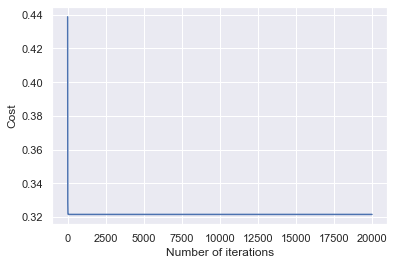

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.500021685936652 

Threshold level 1e-06 

Cost Function converges at 43 

Model Cost:  0.3198804144551451 

Model Coefficients: 
[[ 0.45087771  0.27599623  0.04395744 -0.28873858 -0.24240392 -0.0119899
  -0.02190159 -0.00644696 -0.01921664 -0.04378868 -0.10003214 -0.0042756
  -0.12517046 -0.02116267]]
alpha: 0.2


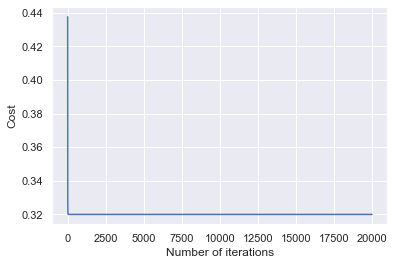

In [133]:
#different Threshold levels:
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.000001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLogisticModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
logisticModel_tr41 = developLogisticModel_1(x1_train_l,y1_train_l)
logisticModel_te41 = developLogisticModel_1(x1_test_l,y1_test_l)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.4999999999999998 

Threshold level 1e-07 

Cost Function converges at 54 

Model Cost:  0.32156330775823283 

Model Coefficients: 
[[ 0.44917305  0.27504323  0.04886828 -0.28719797 -0.24562571 -0.01238468
  -0.02016434 -0.00444076 -0.02129589 -0.04532177 -0.10232155 -0.0107943
  -0.12658488 -0.02685845]]
alpha: 0.2


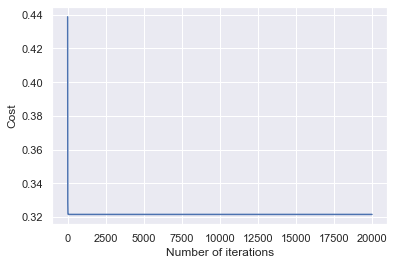

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.500021685936652 

Threshold level 1e-07 

Cost Function converges at 54 

Model Cost:  0.31987595247812833 

Model Coefficients: 
[[ 0.45087771  0.27599623  0.04395744 -0.28873858 -0.24240392 -0.0119899
  -0.02190159 -0.00644696 -0.01921664 -0.04378868 -0.10003214 -0.0042756
  -0.12517046 -0.02116267]]
alpha: 0.2


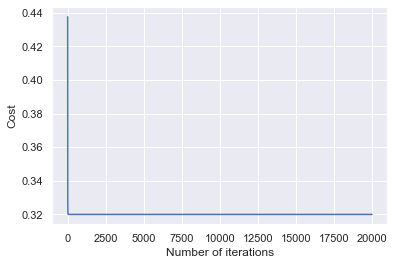

In [134]:
#Best Model
def gradientDescent_1(dataFile, dataTarget, coeffMatrix, alpha, iterations):
    costHistory = [0] * iterations;
    dataLength = len(dataTarget);
    for i in range(iterations):
        loss = dataFile.dot(coeffMatrix.T) - dataTarget;
        gradient = dataFile.T.dot(loss) / dataLength;
        coeffMatrix = coeffMatrix - (alpha * gradient.T);
        costValue = costFunction(dataFile, dataTarget, coeffMatrix);
        costHistory[i] = costValue;    
    list=[0.0000001];
    cost1 = []
    for k in list:
        for j in range(len(costHistory)-1):
            c = abs(costHistory[j]- costHistory[j+1])
            if c <=k:
                print("Threshold level",k,'\n')
                print("Cost Function converges at", j,'\n')
                print('Model Cost: ', costHistory[j], '\n')
                break
        cost1.append(costHistory[j])
        print('Model Coefficients: ');
        print(coeffMatrix);
    print('alpha:',alpha);
    plt.plot(costHistory) 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Cost") 
    plt.show() 
    return coeffMatrix, costHistory;
def developLogisticModel_1(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent_1(dataFile, dataTarget, coeffMatrix,0.2,20000);
    return coeffMatrix;
logisticModel_tr51 = developLogisticModel_1(x1_train_l,y1_train_l)
logisticModel_te51 = developLogisticModel_1(x1_test_l,y1_test_l)


In [135]:
predictedTarget_te11 = predict(x1_test, logisticModel_te11);
predictedTarget_te21 = predict(x1_test, logisticModel_te21);
predictedTarget_te31 = predict(x1_test, logisticModel_te31);
predictedTarget_te41 = predict(x1_test, logisticModel_te41);
predictedTarget_te51 = predict(x1_test, logisticModel_te51);

predictedTarget_tr11 = predict(x1_train, logisticModel_tr11);
predictedTarget_tr21 = predict(x1_train, logisticModel_tr21);
predictedTarget_tr31 = predict(x1_train, logisticModel_tr31);
predictedTarget_tr41 = predict(x1_train, logisticModel_tr41);
predictedTarget_tr51 = predict(x1_train, logisticModel_tr51);

In [136]:
modelMSE_te11 = calculateMSE(y1_test, predictedTarget_te11);
modelMSE_te21 = calculateMSE(y1_test, predictedTarget_te21);
modelMSE_te31 = calculateMSE(y1_test, predictedTarget_te31);
modelMSE_te41= calculateMSE(y1_test, predictedTarget_te41);
modelMSE_te51 = calculateMSE(y1_test, predictedTarget_te51);

modelMSE_tr11 = calculateMSE(y1_train, predictedTarget_tr11);
modelMSE_tr21 = calculateMSE(y1_train, predictedTarget_tr21);
modelMSE_tr31 = calculateMSE(y1_train, predictedTarget_tr31);
modelMSE_tr41 = calculateMSE(y1_train, predictedTarget_tr41);
modelMSE_tr51 = calculateMSE(y1_train, predictedTarget_tr51);

In [137]:
print('Model MSE Train1 for Threshold 0.001:', modelMSE_tr11,'\n');
print('Model MSE Train2 for Threshold 0.0001:', modelMSE_tr21,'\n');
print('Model MSE Train3 for Threshold 0.00001:', modelMSE_tr31,'\n');
print('Model MSE Train4 for Threshold 0.000001:', modelMSE_tr41,'\n');
print('Model MSE Train5 for Threshold 0.0000001:', modelMSE_tr51,'\n');

Model MSE Train1 for Threshold 0.001: [0.48205217] 

Model MSE Train2 for Threshold 0.0001: [0.48205217] 

Model MSE Train3 for Threshold 0.00001: [0.48205217] 

Model MSE Train4 for Threshold 0.000001: [0.48205217] 

Model MSE Train5 for Threshold 0.0000001: [0.48205217] 



In [138]:
print('Model MSE Test for Threshold 0.001:', modelMSE_te11,'\n');
print('Model MSE Test for Threshold 0.0001:', modelMSE_te21,'\n');
print('Model MSE Test for Threshold 0.00001:', modelMSE_te31,'\n');
print('Model MSE Test for Threshold 0.000001:', modelMSE_te41,'\n');
print('Model MSE Test for Threshold 0.0000001:', modelMSE_te51,'\n');

Model MSE Test for Threshold 0.001: [0.48105165] 

Model MSE Test for Threshold 0.0001: [0.48105165] 

Model MSE Test for Threshold 0.00001: [0.48105165] 

Model MSE Test for Threshold 0.000001: [0.48105165] 

Model MSE Test for Threshold 0.0000001: [0.48105165] 



In [139]:
modelR2_tr11 = modelRSquared(y1_train, predictedTarget_tr11);
modelR2_tr21 = modelRSquared(y1_train, predictedTarget_tr21);
modelR2_tr31 = modelRSquared(y1_train, predictedTarget_tr31);
modelR2_tr41 = modelRSquared(y1_train, predictedTarget_tr41);
modelR2_tr51 = modelRSquared(y1_train, predictedTarget_tr51);

modelR2_te11 = modelRSquared(y1_test, predictedTarget_te11);
modelR2_te21 = modelRSquared(y1_test, predictedTarget_te21);
modelR2_te31 = modelRSquared(y1_test, predictedTarget_te31);
modelR2_te41 = modelRSquared(y1_test, predictedTarget_te41);
modelR2_te51 = modelRSquared(y1_test, predictedTarget_te51);

In [140]:
print('Model R-Squared for Training: ','\n', modelR2_tr11,'\n', modelR2_tr21,'\n', 
      modelR2_tr31,'\n', modelR2_tr41,'\n',modelR2_tr51, '\n');

Model R-Squared for Training:  
 0.5179478257799297 
 0.5179478257799297 
 0.5179478257799297 
 0.5179478257799297 
 0.5179478257799297 



In [141]:
print('Model R-Squared for Test: ','\n', modelR2_te11,'\n', modelR2_te21,'\n', 
      modelR2_te31,'\n', modelR2_te41,'\n',modelR2_te51, '\n');

Model R-Squared for Test:  
 0.5202555685349817 
 0.5202555685349817 
 0.5202555685349817 
 0.5202555685349817 
 0.5202555685349817 



# Experimet 3

In [142]:
feature_c = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN']
feature_3 = gpu_usage_a[feature_c]
target_3 = gpu_usage_a[avg_gpu_usage_1]

In [143]:
x3_train, x3_test, y3_train, y3_test = train_test_split(feature_3, target_3, test_size = 0.2, random_state = 0)

In [144]:
x3_train=scaler.fit_transform(x3_train)
x3_test=scaler.transform(x3_test)
y3_train = scaler.fit_transform(y3_train)
y3_test=scaler.transform(y3_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.22752108849868247 

Model Coefficients: 
[[ 0.50227688  0.39675927  0.08463525 -0.39620961 -0.38205337  0.00070927
  -0.00144764 -0.01320392 -0.01557582 -0.04111946]]
alpha: 0.2


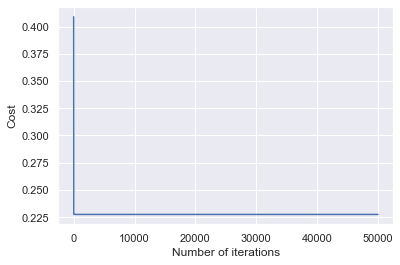

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5013704313109258 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.22681219615712456 

Model Coefficients: 
[[ 0.50448357  0.39745478  0.07737854 -0.39532266 -0.38197565 -0.00057184
  -0.00205928 -0.01748972 -0.01507099 -0.04149835]]
alpha: 0.2


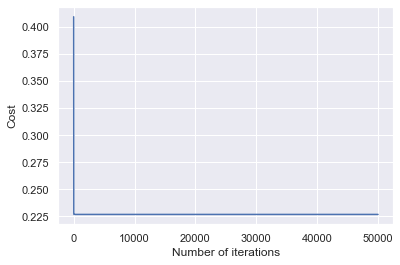

In [145]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;
linearModel_31 = developLinearModel(x3_train,y3_train)
linearModel_32 = developLinearModel(x3_test,y3_test)

In [146]:
predictedTarget_31 = predict(x3_test, linearModel_31);

modelMSE_31 = calculateMSE(y3_test, predictedTarget_31);

print('Model MSE Train:', modelMSE_31,'\n');

modelR2_31 = modelRSquared(y3_test, predictedTarget_31);
print('Model R-Squared for Train: ', modelR2_31,);

Model MSE Train: [0.45369907] 

Model R-Squared for Train:  0.5475338184190661


In [147]:
predictedTarget_32 = predict(x3_test, linearModel_32);

modelMSE_32 = calculateMSE(y3_test, predictedTarget_32);

print('Model MSE Text:', modelMSE_32,'\n');

modelR2_32 = modelRSquared(y3_test, predictedTarget_31);
print('Model R-Squared for Test: ', modelR2_32,);

Model MSE Text: [0.45362344] 

Model R-Squared for Test:  0.5475338184190661


In [148]:
from sklearn.model_selection import train_test_split
X_train_l3, X_test_l3, y_train_l3, y_test_l3 = train_test_split(feature_3, target_2, test_size = 0.20, random_state = 0)
gb_clf = GradientBoostingClassifier( learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_l3, y_train_l3)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l3, y_train_l3)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l3, y_test_l3)))
predictions = gb_clf.predict(X_test_l3)
print("Confusion Matrix:")
print(confusion_matrix(y_test_l3, predictions))
print("Classification Report")
print(classification_report(y_test_l3, predictions))

Learning rate:  1.25
Accuracy score (training): 0.869
Accuracy score (test): 0.870
Confusion Matrix:
[[21682  2468]
 [ 3792 20276]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     24150
           1       0.89      0.84      0.87     24068

    accuracy                           0.87     48218
   macro avg       0.87      0.87      0.87     48218
weighted avg       0.87      0.87      0.87     48218



# Exp 4

In [149]:
feature_d = ['NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM', 'VWN', 'STRM', 'STRN', 'SA', 'SB']
feature_4 = gpu_usage_a[feature_d]
target_4 = gpu_usage_a[avg_gpu_usage_1]
feature_4.head()

,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB
0,8,8,8,2,1,1,0,0,0,0
1,8,8,8,2,1,1,0,0,0,1
2,8,8,8,2,1,1,0,0,1,0
3,8,8,8,2,1,1,0,0,1,1
4,8,8,8,2,1,1,0,1,0,0


In [150]:
x4_train, x4_test, y4_train, y4_test = train_test_split(feature_4, target_4, test_size = 0.2, random_state = 0)

In [151]:
x4_train=scaler.fit_transform(x4_train)
x4_test=scaler.transform(x4_test)
y4_train = scaler.fit_transform(y4_train)
y4_test=scaler.transform(y4_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 33 

Model Cost:  0.4341525774121366 

Model Coefficients: 
[[-0.23851744  0.03901579  0.03891266 -0.01610124  0.21997064  0.12033569
  -0.0605377  -0.00828265 -0.09095263 -0.0279165 ]]
alpha: 0.2


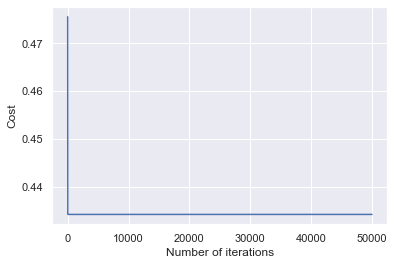

In [152]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;
linearModel_4 = developLinearModel(x4_train,y4_train)

# Eval uation matrics

In [153]:
predictedTarget_41 = predict(x4_train, linearModel_4);

modelMSE_41 = calculateMSE(y4_train, predictedTarget_41);

print('Model MSE Train:', modelMSE_41,'\n');

modelR2_41 = modelRSquared(y4_train, predictedTarget_41);
print('Model R-Squared for Test: ', modelR2_41);

Model MSE Train: [0.86830447] 

Model R-Squared for Test:  0.13169552584161515


In [154]:
predictedTarget_4 = predict(x4_test, linearModel_4);

modelMSE_4 = calculateMSE(y4_test, predictedTarget_4);

print('Model MSE:', modelMSE_4,'\n');

modelR2_4 = modelRSquared(y4_test, predictedTarget_4);
print('Model R-Squared for Test: ', modelR2_4);

Model MSE: [0.8714047] 

Model R-Squared for Test:  0.13096327305033695


In [155]:
from sklearn.model_selection import train_test_split
X_train_l4, X_test_l4, y_train_l4, y_test_l4 = train_test_split(feature_4, target_2, test_size = 0.20, random_state = 0)
gb_clf = GradientBoostingClassifier( learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_l4, y_train_l4)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l4, y_train_l4)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l4, y_test_l4)))
predictions = gb_clf.predict(X_test_l4)
print("Confusion Matrix:")
print(confusion_matrix(y_test_l4, predictions))
print("Classification Report")
print(classification_report(y_test_l4, predictions))

Learning rate:  1.25
Accuracy score (training): 0.655
Accuracy score (test): 0.654
Confusion Matrix:
[[16478  7672]
 [ 9009 15059]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.68      0.66     24150
           1       0.66      0.63      0.64     24068

    accuracy                           0.65     48218
   macro avg       0.65      0.65      0.65     48218
weighted avg       0.65      0.65      0.65     48218



# Exp 4 - b

In [165]:
feature_e = ["MWG", "NWG", "KWG", "MDIMC", "NDIMC", "MDIMA", "NDIMB", "KWI", "VWM", "VWN", "STRM", "STRN", "SA", "SB"]
feature_4b = gpu_usage_a[feature_e]
target_4b = gpu_usage_a[avg_gpu_usage_1]

In [166]:
x4b_train, x4b_test, y4b_train, y4b_test = train_test_split(feature_4b, target_4b, test_size = 0.2, random_state = 0)

In [167]:
x4b_train=scaler.fit_transform(x4b_train)
x4b_test=scaler.transform(x4b_test)
y4b_train = scaler.fit_transform(y4b_train)
y4b_test=scaler.transform(y4b_test)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Initial Cost:  0.5000000000000001 

Threshold level 1e-07 

Cost Function converges at 56 

Model Cost:  0.2214328936484323 

Model Coefficients: 
[[ 0.50203577  0.39637015  0.08442112 -0.39594155 -0.38179981  0.00059929
  -0.00129512 -0.01332445 -0.01542743 -0.04102379 -0.06070891 -0.00880489
  -0.0883344  -0.02479818]]
alpha: 0.2


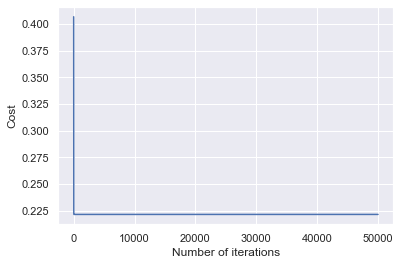

In [168]:
def developLinearModel(dataFile, dataTarget):
    coeffMatrix = np.zeros((1, len(dataFile[0])));
    print(coeffMatrix);
    print();
    initialCost = costFunction(dataFile, dataTarget, coeffMatrix);
    print('Initial Cost: ', initialCost, '\n');
    coeffMatrix, costHistory = gradientDescent(dataFile, dataTarget, coeffMatrix,0.2, 50000);
    return coeffMatrix;
linearModel_4b = developLinearModel(x4b_train,y4b_train)

In [169]:
predictedTarget_4b1 = predict(x4b_train, linearModel_4b);

modelMSE_4b1 = calculateMSE(y4b_train, predictedTarget_4b1);

print('Model MSE Train:', modelMSE_4b1,'\n');

modelR2_4b1 = modelRSquared(y4b_train, predictedTarget_4b1);
print('Model R-Squared for Train: ', modelR2_4b1);

Model MSE Train: [0.44286479] 

Model R-Squared for Train:  0.5571352075376292


In [170]:
predictedTarget_4b = predict(x4b_test, linearModel_4b);

modelMSE_4b = calculateMSE(y4b_test, predictedTarget_4b);

print('Model MSE:', modelMSE_4b,'\n');

modelR2_4b = modelRSquared(y4b_test, predictedTarget_4b);
print('Model R-Squared for Test: ', modelR2_4b,);

Model MSE: [0.44222978] 

Model R-Squared for Test:  0.5589719497228809


In [171]:
from sklearn.model_selection import train_test_split
X_train_l4b, X_test_l4b, y_train_l4b, y_test_l4b = train_test_split(feature_4b, target_2, test_size = 0.20, random_state = 0)
gb_clf = GradientBoostingClassifier( learning_rate=1.25, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_l4b, y_train_l4b)

print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_l4b, y_train_l4b)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test_l4b, y_test_l4b)))
predictions = gb_clf.predict(X_test_l4b)
print("Confusion Matrix:")
print(confusion_matrix(y_test_l4b, predictions))
print("Classification Report")
print(classification_report(y_test_l4b, predictions))

Learning rate:  1.25
Accuracy score (training): 0.885
Accuracy score (test): 0.884
Confusion Matrix:
[[21453  2697]
 [ 2894 21174]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     24150
           1       0.89      0.88      0.88     24068

    accuracy                           0.88     48218
   macro avg       0.88      0.88      0.88     48218
weighted avg       0.88      0.88      0.88     48218

